<a href="https://colab.research.google.com/github/Tony14100/Date-cocktail/blob/main/%D0%9F%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D0%BA%D0%BB%D1%8E%D1%87%D0%B5%D0%B2%D1%8B%D0%B5_%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%81%D0%B5%D1%80%D0%B4%D0%B5%D1%87%D0%BD%D0%BE_%D1%81%D0%BE%D1%81%D1%83%D0%B4%D0%B8%D1%81%D1%82%D1%8B%D1%85_%D0%B7%D0%B0%D0%B1%D0%BE%D0%BB%D0%B5%D0%B2%D0%B0%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Как описано выше, исходный набор данных из почти 300 переменных был сокращен примерно до 20 переменных. В дополнение к классическому EDA этот набор данных можно использовать для применения ряда методов машинного обучения, в первую очередь моделей классификаторов (логистическая регрессия, SVM, случайный лес и т. д.). Переменную "HeartDisease" следует рассматривать как бинарную ("Да" - у респондента было заболевание сердца; "Нет" - у респондента не было заболевания сердца). Но учтите, что классы не сбалансированы, поэтому применение классической модели нецелесообразно. Фиксация весов/недостаточная выборка должны дать значительно лучшие результаты. На основе набора данных я построил модель логистической регрессии и встроил ее в приложение, которое может вас вдохновить: https://heart-condition-checker.herokuapp.com/. Можете ли вы указать, какие переменные оказывают существенное влияние на вероятность сердечно-сосудистых заболеваний?

In [ ]:

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/gdrive/MyDrive/~ .kaggle'

In [ ]:
!pip install kaggle

In [ ]:
os.chdir('/gdrive/MyDrive/~ .kaggle')

In [ ]:
!kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease

In [ ]:
os.listdir()

['heart_2020_cleaned.csv',
 'orders_data.xlsx',
 'kaggle.json',
 'amazon-seller-order-status-prediction.zip',
 '.ipynb_checkpoints',
 'report.html',
 'orders_data.html',
 'model.png',
 'orders_data.csv',
 'personal-key-indicators-of-heart-disease.zip',
 'personal-key-indicators-of-heart-disease.zip.html',
 'personal.html']

In [ ]:
zip_path = 'personal-key-indicators-of-heart-disease.zip'

In [ ]:
os.getcwd()

'/gdrive/MyDrive/~ .kaggle'

In [ ]:
!unzip -q 'personal-key-indicators-of-heart-disease.zip'

replace heart_2020_cleaned.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
os.listdir()

['heart_2020_cleaned.csv',
 'orders_data.xlsx',
 'kaggle.json',
 'amazon-seller-order-status-prediction.zip',
 '.ipynb_checkpoints',
 'report.html',
 'orders_data.html',
 'model.png',
 'orders_data.csv',
 'personal-key-indicators-of-heart-disease.zip',
 'personal-key-indicators-of-heart-disease.zip.html',
 'personal.html']

In [ ]:
!pip3 install pandas-profiling==3.0.0

In [ ]:

import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:

df = pd.read_csv('personal-key-indicators-of-heart-disease.zip')

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Flatten, Dropout, Lambda
from keras.layers.embeddings import Embedding
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

df.isna().sum()

In [ ]:

df_features =df.copy()
df_labels=df_features.pop('HeartDisease')

In [ ]:
inputs = {}

for name, column in df_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'AgeCategory': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'AgeCategory')>,
 'AlcoholDrinking': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'AlcoholDrinking')>,
 'Asthma': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Asthma')>,
 'BMI': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'BMI')>,
 'Diabetic': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Diabetic')>,
 'DiffWalking': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'DiffWalking')>,
 'GenHealth': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'GenHealth')>,
 'KidneyDisease': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'KidneyDisease')>,
 'MentalHealth': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'MentalHealth')>,
 'PhysicalActivity': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'PhysicalActivity')>,
 'PhysicalHealth': <KerasTensor: shape=(None, 1) dtype=float32 (create

In [ ]:

numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(df[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_4')>

In [ ]:
preprocessed_inputs = [all_numeric_inputs]

In [ ]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(df_features[name]))
  one_hot = layers.CategoryEncoding(max_tokens=lookup.vocab_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

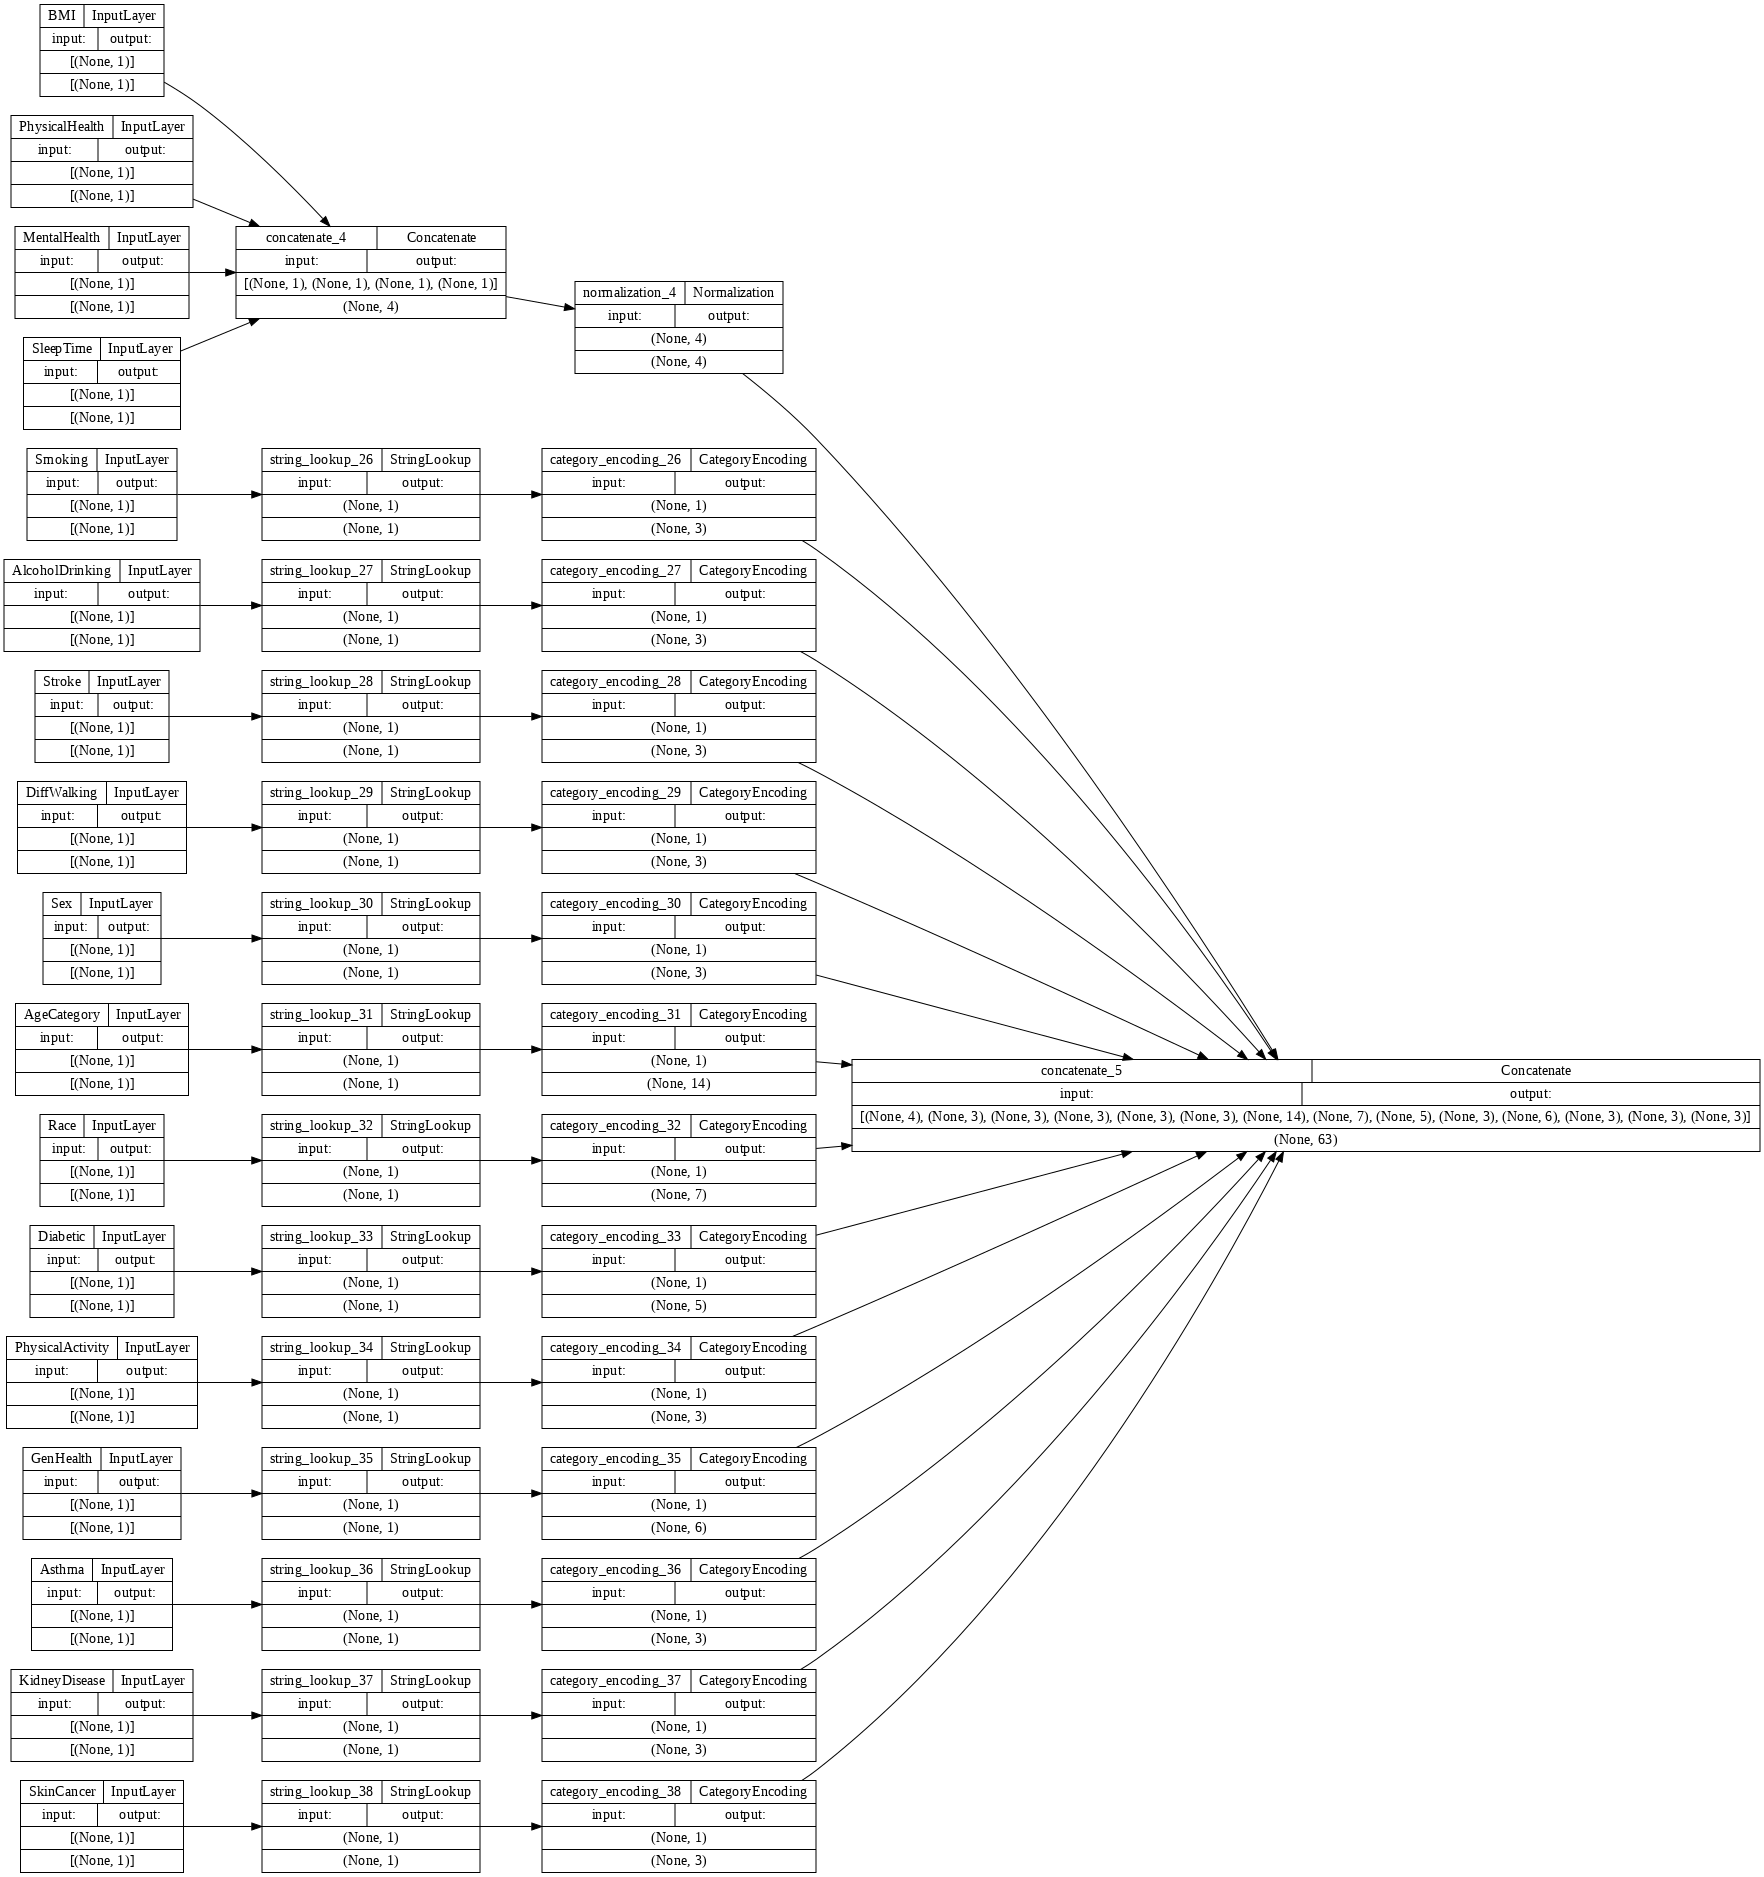

In [ ]:

preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

df_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = df_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [ ]:

df_features_dict = {name: np.array(value) 
                         for name, value in df_features.items()}

In [ ]:
features_dict = {name:values[:1] for name, values in df_features_dict.items()}
df_preprocessing(features_dict)

<tf.Tensor: shape=(1, 63), dtype=float32, numpy=
array([[-1.845, -0.047,  3.281, -1.46 ,  0.   ,  0.   ,  1.   ,  0.   ,
         1.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
         1.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ]],
      dtype=float32)>

In [ ]:
def df_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
  optimizer=tf.optimizers.Adam())
  return model

df_model = df_model(df_preprocessing, inputs)

In [ ]:
df_model.summary()

In [ ]:
df_model.fit(x=df_features_dict, y=df_labels, epochs=10)

Epoch 1/10


UnimplementedError: ignored